<a href="https://colab.research.google.com/github/NataliaKurd/transformers_end_assignment/blob/main/transfomers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfomers: Exploration of memorization in Large Language Models

**Group members:**
- Natalia Kurdanova
- Sean
- Sjardi
- Jefry

In [6]:
import numpy as np
import pandas as pd
import requests

## 0. Data exploration

In [18]:
link_counts = 'https://raw.githubusercontent.com/ethz-spylab/lm_memorization_data/master/data/counts_100.npy'
link_prompts = 'https://raw.githubusercontent.com/ethz-spylab/lm_memorization_data/master/data/prompts_100.npy'

file_counts = requests.get(link_counts)
file_promts = requests.get(link_prompts)

data_counts = np.fromfile(file_counts.content)
data_prompts = np.fromfile(file_prompts.content)

data_counts


# For now file mounting doesn't work too well
# data = np.load('counts_100.npy')
# datap = np.load('prompts_100.npy')
# gens_50_of_100  = np.load('gens_125M_125M-0.0_prompt_50_of_100.npy')
# gens_450_of_500 = np.load('gens_125M_125M-0.0_prompt_450_of_500.npy')

ValueError: embedded null byte

From what I understand so far:
- prompts_{n}.npy: n = sequence length in tokens. The columns are the encoded 100 tokens, with 220 is the padding. These are the sentences gathered from the Pile dataset and not what is used to prompt the model. Since the sentences are longer then the corresponding gens sentences.
- counts_{n}.npy: n = sequence length in tokens. The row corresponds with the i-th sequence and column is the frequency in the Pile dataset. I'm not too sure if and how we can use this.
- gens = They generated output from every sequence in the promps_{n} files, with different prefix lengths (between 50 token and sequence length - 50 tokens.).  I'm not sure how exactly they are ordered in the file.

## You can skip all commented out code since I load the decoded dataset prompts_100 from 127m parameters

In [ ]:
# print(data.shape)
# print(datap.shape)
# print(gens_50_of_100.shape)
# print(gens_450_of_500.shape)

In [ ]:
# from transformers import GPT2Tokenizer
# vocab = GPT2Tokenizer.from_pretrained('EleutherAI/gpt-neo-1.3B')

In [ ]:
# print(datap[1])

In [ ]:
# decoded = vocab.decode(datap[100], skip_special_tokens=True)
# print(decoded)

In [ ]:
# Remove comment if you want to run decoding again

# decoded_texts = []
# for token_ids in datap:
#     decoded_text = vocab.decode(token_ids, skip_special_tokens=True)
#     decoded_texts.append(decoded_text)

# from tempfile import TemporaryFile

# outfile = TemporaryFile()
# np.save('decoded_texts_array.npy', decoded_texts_array)

In [ ]:
# Not needed if loadef in above way
# with open('decoded_texts_array.npy', 'rb') as f:
#     decoded_texts_array = np.load(f)

In [ ]:
# This is for the generated text
# gensprompts_50_100 = []
# for token_ids in gens_50_of_100:
#     for x in token_ids:
#         decoded_text = vocab.decode(x, skip_special_tokens=True)
#         gensprompts_50_100.append(decoded_text)

In [ ]:
# gensprompts_450_500 = []
# for token_ids in gens_450_of_500:
#     for x in token_ids:
#         decoded_text = vocab.decode(x, skip_special_tokens=True)
#         gensprompts_450_500.append(decoded_text)

## Load decoded file from my drive, this is the decoded prompts_100.npy file

In [ ]:
# !pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1SMGgH-nKs23w6HkhueS63RtOTnXOpAjR'
output = 'my_file.npy'
gdown.download(url, output, quiet=False)

# Load the file with NumPy
decoded_texts_array = np.load(output, allow_pickle=True)

Downloading...
From (original): https://drive.google.com/uc?id=1SMGgH-nKs23w6HkhueS63RtOTnXOpAjR
From (redirected): https://drive.google.com/uc?id=1SMGgH-nKs23w6HkhueS63RtOTnXOpAjR&confirm=t&uuid=465db40f-4ba6-4468-b671-b269b073f87b
To: /content/my_file.npy
100%|██████████| 278M/278M [00:01<00:00, 173MB/s]


In [ ]:
print(len(decoded_texts_array))

56000


### Lets learn a bit about our data

Here we can see that there are mostly unique sentences. Only 28 not.

In [ ]:
# Set can only contain unique values
datas = set(decoded_texts_array)

print(len(decoded_texts_array))
print(len(datas))

56000
55972


In [ ]:
df = pd.DataFrame(decoded_texts_array)
df['Length'] = df[0].apply(len)
df['Word_Count'] = df[0].str.split().apply(len)

In [ ]:
df.head()

,0,Length,Word_Count
0,"""mapping"": [\n {\n ...",127,8
1,is required for Ext.flash.Component');\n ...,182,14
2,those days for granted…what I wouldn’t give t...,386,66
3,I had the impression that it is Western-style...,403,80
4,\n\nTABLE 1\n\nTable 1. Stable sweet potato yi...,396,64


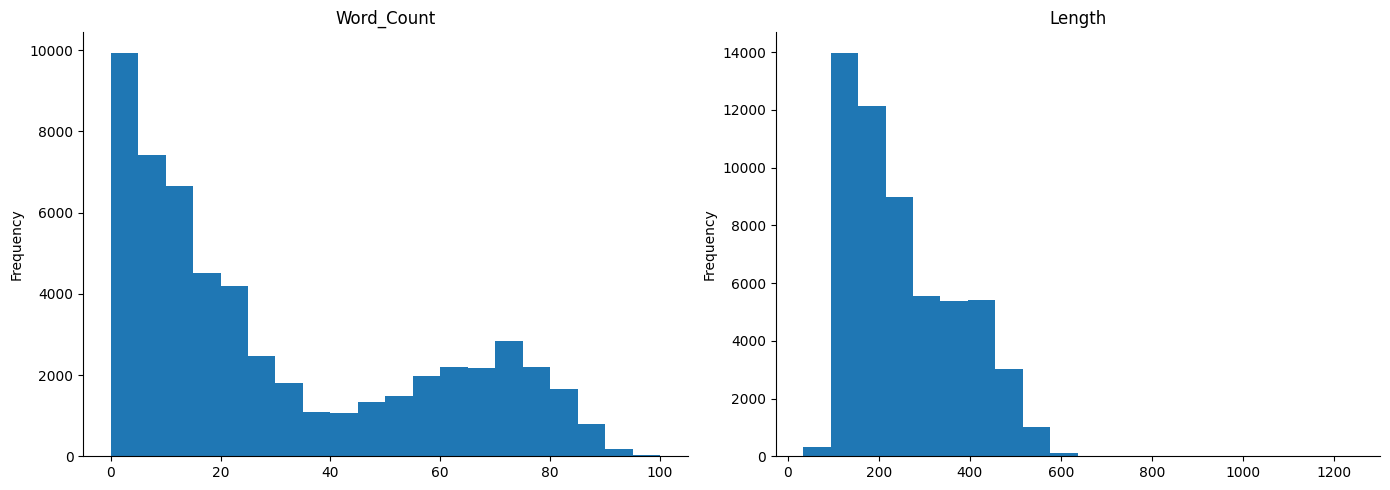

In [ ]:
from matplotlib import pyplot as plt

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))  # Adjust figure size as needed

# Plot the histogram for 'Word_Count' in the first subplot
df['Word_Count'].plot(kind='hist', bins=20, title='Word_Count', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)  # Hide the top and right spines

# Plot the histogram for 'Length' in the second subplot
df['Length'].plot(kind='hist', bins=20, title='Length', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)  # Hide the top and right spines

# Show the plots
plt.tight_layout()  # Adjust the layout to fit both subplots
plt.show()


In [ ]:
from IPython.display import display, HTML

length_describe = df['Length'].describe().to_frame().to_html()
word_count_describe = df['Word_Count'].describe().to_frame().to_html()

combined_html = f"""
<div style='display: flex;'>
    <div style='width: 20%; padding: 10px;'>{length_describe}</div>
    <div style='width: 80%; padding: 10px;'>{word_count_describe}</div>
</div>
"""

display(HTML(combined_html))


,Length
count,56000.000000
mean,253.163107
std,123.915032
min,34.000000
25%,153.000000
50%,223.000000
75%,351.000000
max,1240.000000
,Word_Count
count,56000.000000


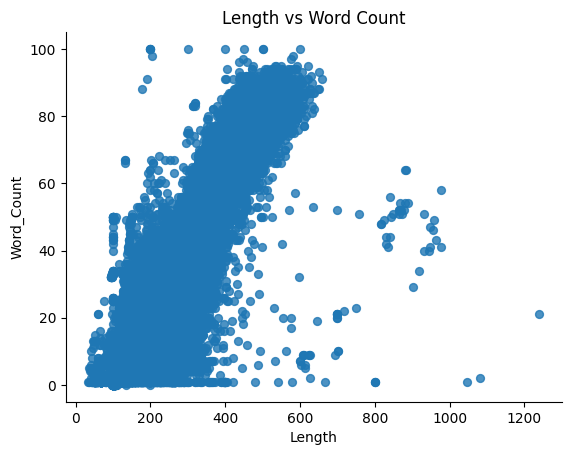

In [ ]:
# Length vs Word_Count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Length', y='Word_Count', s=32, alpha=.8, title='Length vs Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from collections import Counter

# Split sentences into words and flatten the list
all_words = [word for sentence in df[0] for word in sentence.split()]

# Count the words and print the most common ones
word_counts = Counter(all_words)
print(word_counts.most_common(20))

[('the', 59256), ('*', 33144), ('of', 28924), ('to', 27432), ('and', 23542), ('in', 19361), ('a', 18134), ('is', 14417), ('=', 13358), ('or', 12056), ('for', 10656), ('{', 10220), ('you', 9083), ('this', 8999), ('//', 8965), ('that', 8515), ('with', 8199), ('be', 7823), ('}', 7805), ('on', 7545)]


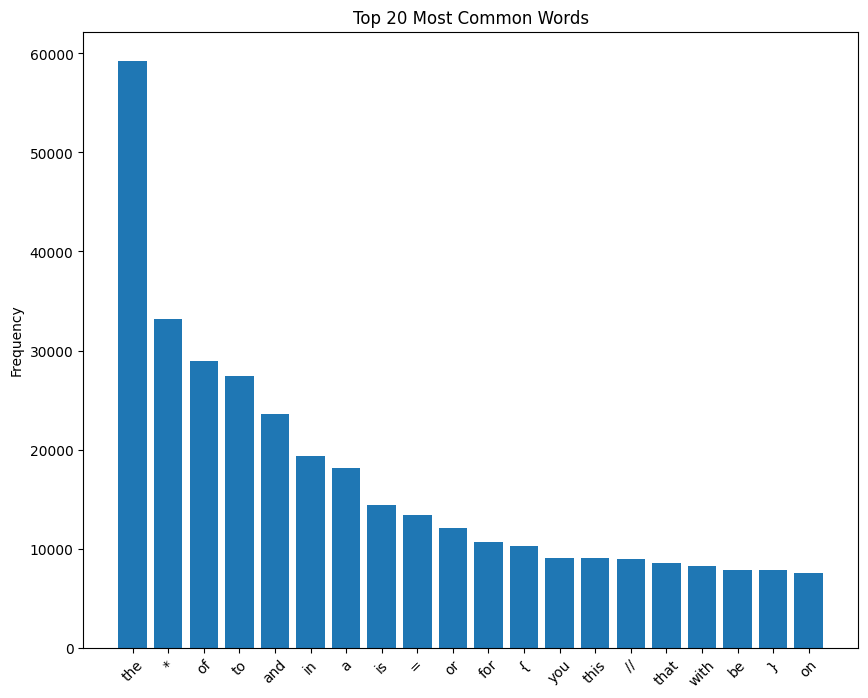

In [ ]:
import matplotlib.pyplot as plt

top_n = 20
most_common_words = word_counts.most_common(top_n)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in all_words if not w.lower() in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Without stopwords its not getting any better

[('*', 33144), ('=', 13358), ('{', 10220), ('//', 8965), ('}', 7805), ('License', 6020), ('#', 4307), ('may', 4302), ('0', 4192), ('distributed', 3880), ('file', 3357), ('-', 3082), ('*/', 2980), ('use', 2878), (':', 2745), ('1', 2719), ('"', 2688), ('copy', 2634), ('|', 2592), ('without', 2570)]


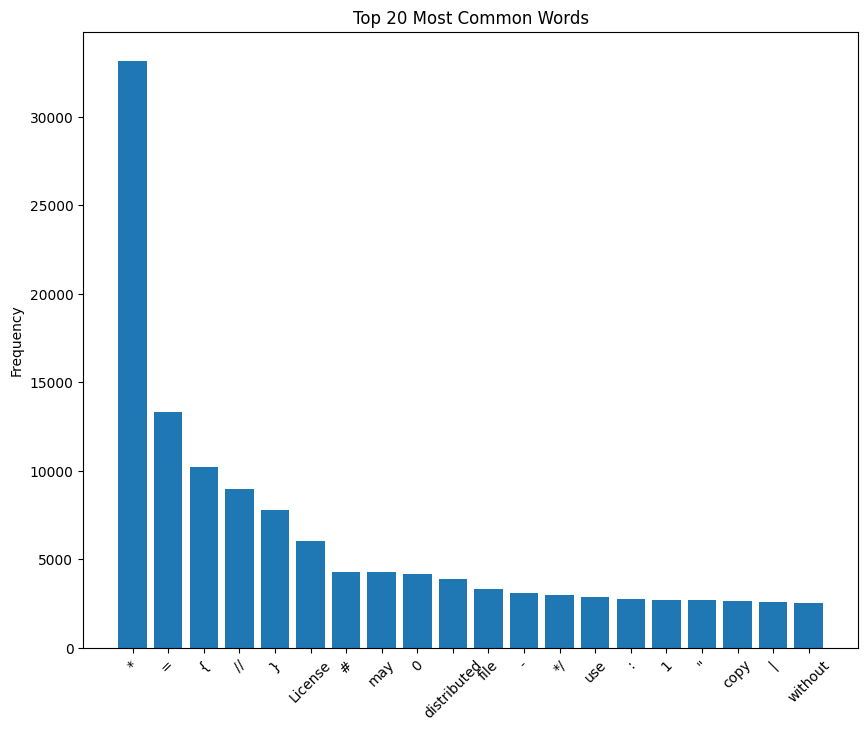

In [ ]:
import matplotlib.pyplot as plt

word_counts = Counter(filtered_sentence)
print(word_counts.most_common(20))

top_n = 20
most_common_words = word_counts.most_common(top_n)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words Without Stopwords')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

#### Unique words

In [ ]:
unique_words = set(all_words)
print(f'Number of unique words: {len(unique_words)}')

Number of unique words: 218530


#### With profiling we can see that there are also a lot of non-English and different characters

In [ ]:
!pip install matplotlib
import matplotlib
import pandas as pd
!pip install ydata_profiling
from ydata_profiling import ProfileReport
import matplotlib
profile = ProfileReport(df, minimal=True)
profile.to_widgets()
profile.to_notebook_iframe()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:524: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Loading the model and prompt it

I'm not sure if it is possible (and faster) to save it locally so loading it from huggingface is easy and takes 1 minute.
This is the 1.3B model but above statistics were the smaller model for now.

In [ ]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer

model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
prom = "Len int for shift := uint(0); ; shift += 7 { if shift >= 64 { returnErrIntOverflowRaft"
prompt = (prom)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
gen_text

'Len int for shift := uint(0); ; shift += 7 { if shift >= 64 { returnErrIntOverflowRaftz2 } else if shift >= 128 { returnErrIntOverflowRaftz2 } else { returnErrIntOverflowRaftz2 } }\n\nfunc (e *bolt.Entry) Len() int { return len(e.entries) }\n\nfunc (e *bolt.Entry) entries() []string {\n'

In [ ]:
# Split sentences into words
splitprompt = set(prom.split())
splitgen_text = set(gen_text.split())

unique_to_s1 = splitprompt - splitgen_text
unique_to_s2 = splitgen_text - splitprompt

# Concatenate the unique words back into sentences
unique_sentence1 = ' '.join(unique_to_s1)
unique_sentence2 = ' '.join(unique_to_s2)

# Print the unique sentences
print("Unique to first sentence:", unique_sentence1)
print("Unique to second sentence:", unique_sentence2)


Unique to first sentence: returnErrIntOverflowRaft
Unique to second sentence: Len() } (e *bolt.Entry) returnErrIntOverflowRaftz2 return 128 else func []string len(e.entries) entries()
